In [86]:
# import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# reading csv

In [ ]:
df = pd.read_csv('glass_data.csv')

In [ ]:
df

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [88]:
# dropping first column because it is not necessary

In [ ]:
df.drop('column_a',axis=1,inplace=True)

In [ ]:
df

,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [89]:
# getting information of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_b  214 non-null    float64
 1   column_c  214 non-null    float64
 2   column_d  214 non-null    float64
 3   column_e  214 non-null    float64
 4   column_f  214 non-null    float64
 5   column_g  214 non-null    float64
 6   column_h  214 non-null    float64
 7   column_i  214 non-null    float64
 8   column_j  214 non-null    float64
 9   column_k  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [90]:
# splitting dataset into X and y. X for features and y for target

In [ ]:
X = df[['column_b','column_c','column_d','column_e','column_f','column_g','column_h','column_i','column_j']]
y = df['column_k']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [96]:
# 

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression(max_iter=5000, solver='saga')

In [ ]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lgr_pred = lgr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, lgr_pred)

array([[ 8,  5,  0,  0,  0,  0],
       [11, 11,  0,  1,  1,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  9]])

In [ ]:
print(classification_report(y_test, lgr_pred))

              precision    recall  f1-score   support

           1       0.38      0.62      0.47        13
           2       0.55      0.46      0.50        24
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.90      0.90      0.90        10

    accuracy                           0.52        54
   macro avg       0.31      0.33      0.31        54
weighted avg       0.50      0.52      0.50        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
# 

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,pred)

array([[ 5,  3,  5,  0,  0,  0],
       [ 8, 15,  0,  1,  0,  0],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  1,  0,  7]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.33      0.38      0.36        13
           2       0.65      0.62      0.64        24
           3       0.17      0.25      0.20         4
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      0.70      0.82        10

    accuracy                           0.54        54
   macro avg       0.53      0.49      0.50        54
weighted avg       0.59      0.54      0.56        54



In [ ]:
error_rate = []

for i in range(1,40):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train,y_train)

  pred_i = kn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

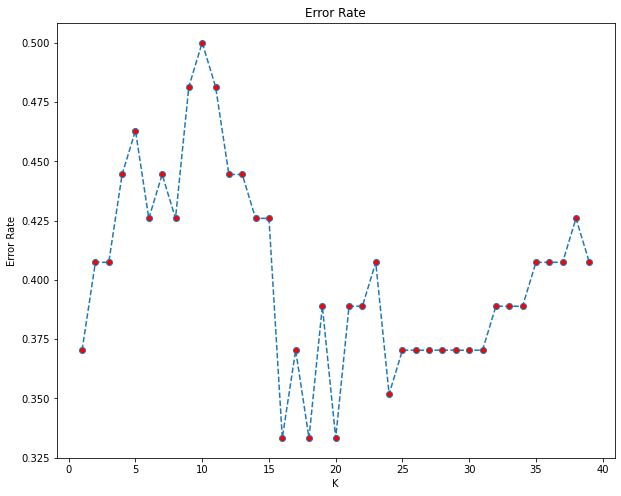

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,marker='o',linestyle='dashed',markerfacecolor='red')
plt.title('Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
kn = KNeighborsClassifier(n_neighbors=16)

kn.fit(X_train, y_train)

prediction = kn.predict(X_test)

print(confusion_matrix(y_test,prediction))

print(classification_report(y_test,prediction))

[[10  3  0  0  0  0]
 [ 6 17  0  1  0  0]
 [ 2  1  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  0  0  0  0  0]
 [ 0  2  0  1  0  7]]
              precision    recall  f1-score   support

           1       0.53      0.77      0.62        13
           2       0.71      0.71      0.71        24
           3       1.00      0.25      0.40         4
           5       0.33      0.50      0.40         2
           6       0.00      0.00      0.00         1
           7       1.00      0.70      0.82        10

    accuracy                           0.67        54
   macro avg       0.59      0.49      0.49        54
weighted avg       0.71      0.67      0.66        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
#

#Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
dtree_pred = dtree.predict(X_test)

In [78]:
confusion_matrix(y_test, dtree_pred)

array([[11,  1,  0,  0,  1,  0],
       [ 8, 13,  2,  0,  1,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0,  8]])

In [79]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           1       0.52      0.85      0.65        13
           2       0.65      0.54      0.59        24
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.33      1.00      0.50         1
           7       1.00      0.80      0.89        10

    accuracy                           0.61        54
   macro avg       0.42      0.53      0.44        54
weighted avg       0.61      0.61      0.59        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
#

#Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier()

In [82]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
rfc_pred = rfc.predict(X_test)

In [84]:
confusion_matrix(y_test, rfc_pred)

array([[ 9,  3,  1,  0,  0,  0],
       [ 5, 18,  0,  0,  1,  0],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  0,  8]])

In [85]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           1       0.56      0.69      0.62        13
           2       0.72      0.75      0.73        24
           3       0.50      0.25      0.33         4
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         1
           7       0.89      0.80      0.84        10

    accuracy                           0.69        54
   macro avg       0.53      0.58      0.53        54
weighted avg       0.67      0.69      0.67        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
